In [12]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()
notas.shape

(100836, 4)

In [13]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [15]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [16]:
print('Média: ', notas['nota'].mean())

Média:  3.501556983616962


<AxesSubplot:ylabel='Frequency'>

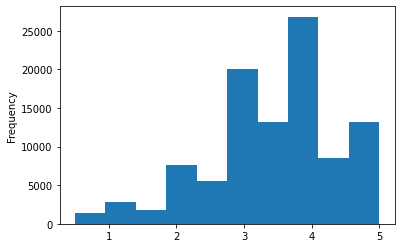

In [17]:
notas.nota.head() #somente as 5 primeiras
notas.nota.plot(kind='hist')


In [18]:
print('Mediana: ', notas['nota'].median())

Mediana:  3.5


In [19]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<AxesSubplot:xlabel='nota'>

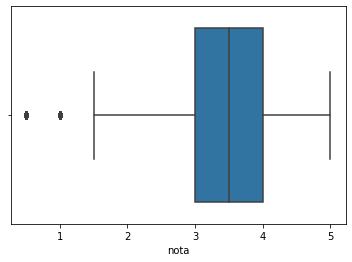

In [20]:
import seaborn as sns

sns.boxplot(notas.nota)

In [21]:
import pandas as pd

filmes = pd.read_csv('movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
notas.query('filmeId == 1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [23]:
notas.query('filmeId == 1').nota.mean()

3.9209302325581397

In [24]:
media_por_filme = notas.groupby('filmeId').mean().nota

<AxesSubplot:ylabel='Frequency'>

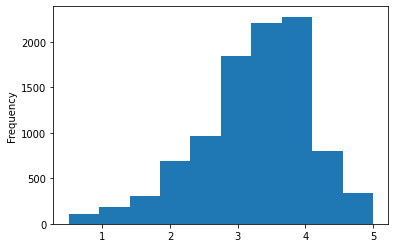

In [25]:
media_por_filme.plot(kind='hist')

<AxesSubplot:xlabel='nota'>

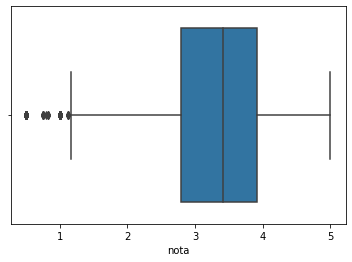

In [26]:
sns.boxplot(media_por_filme)

In [27]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

In [28]:
sns.displot(media_por_filme, bins=10)

AttributeError: module 'seaborn' has no attribute 'displot'

In [ ]:
import matplotlib.pyplot as plt
plt.hist(media_por_filme)
plt.title('Histograma das medias dos filmes')

In [ ]:
import pandas as pd
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()


In [ ]:
tmdb.original_language.unique() #variavel nominal sem categoria

tmdb.budget.unique() #variavel quantitativa continua

tmdb.vote_count.unique() #variavel quantitativa intervalar

In [ ]:
tmdb['original_language'].value_counts()

contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['lingua_original', 'total']
contagem_de_lingua.head()

In [ ]:
import seaborn as sns
sns.barplot(x='lingua_original', y='total', data = contagem_de_lingua)


In [ ]:
sns.catplot(x="lingua_original", kind="count", data= tmdb)

In [ ]:
import matplotlib.pyplot as plt
plt.pie(contagem_de_lingua['total'], labels= contagem_de_lingua['lingua_original'])

In [37]:
import pandas as pd
import seaborn as sns
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_ingles
print(total_ingles, total_do_resto)

dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [4505, 298]
}

dados = pd.DataFrame(dados)

4505 298


<AxesSubplot:xlabel='lingua', ylabel='total'>

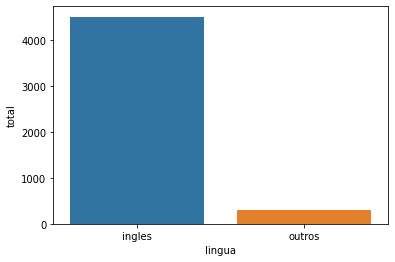

In [38]:
sns.barplot(x='lingua', y='total', data= dados)


([<matplotlib.patches.Wedge at 0x11e421160>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.21305550494824674, 'outros')])

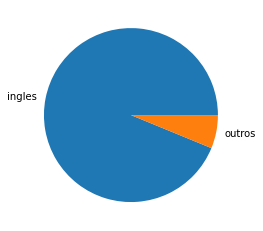

In [39]:
plt.pie(dados['total'], labels= dados['lingua'])

In [45]:
filmes_sem_lingua_original_ingles = tmdb.query("original_language != 'en'").original_language.value_counts()

sns.catplot(x="lingua_original", kind="count", data= filmes_sem_lingua_original_ingles)

0.9.0
